In [5]:
# Pandas
import pandas as pd

# Numpy 
import numpy as np
from numpy.random import seed
seed(1)

# Keras
from keras import backend
from keras.layers import Dense, Flatten, Dropout, LSTM, ConvLSTM2D, TimeDistributed
from keras.models import Sequential
# from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.losses import mean_squared_error
# from tensorflow import set_random_seed
import tensorflow as tf
tf.random.set_seed(2)

# Matplotlib and Seaborn
import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

# Sklearn 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PowerTransformer

## Import dataset

In [6]:
df = pd.read_csv('../datasets/household_power_consumption_v3_drop.txt', parse_dates={'datetime' : ['date','time']}, index_col='datetime', sep=';', usecols=[1,2,3,4,5,6,7,8,9,11,12,13])
df.head(5)

,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day,month,year
datetime,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006


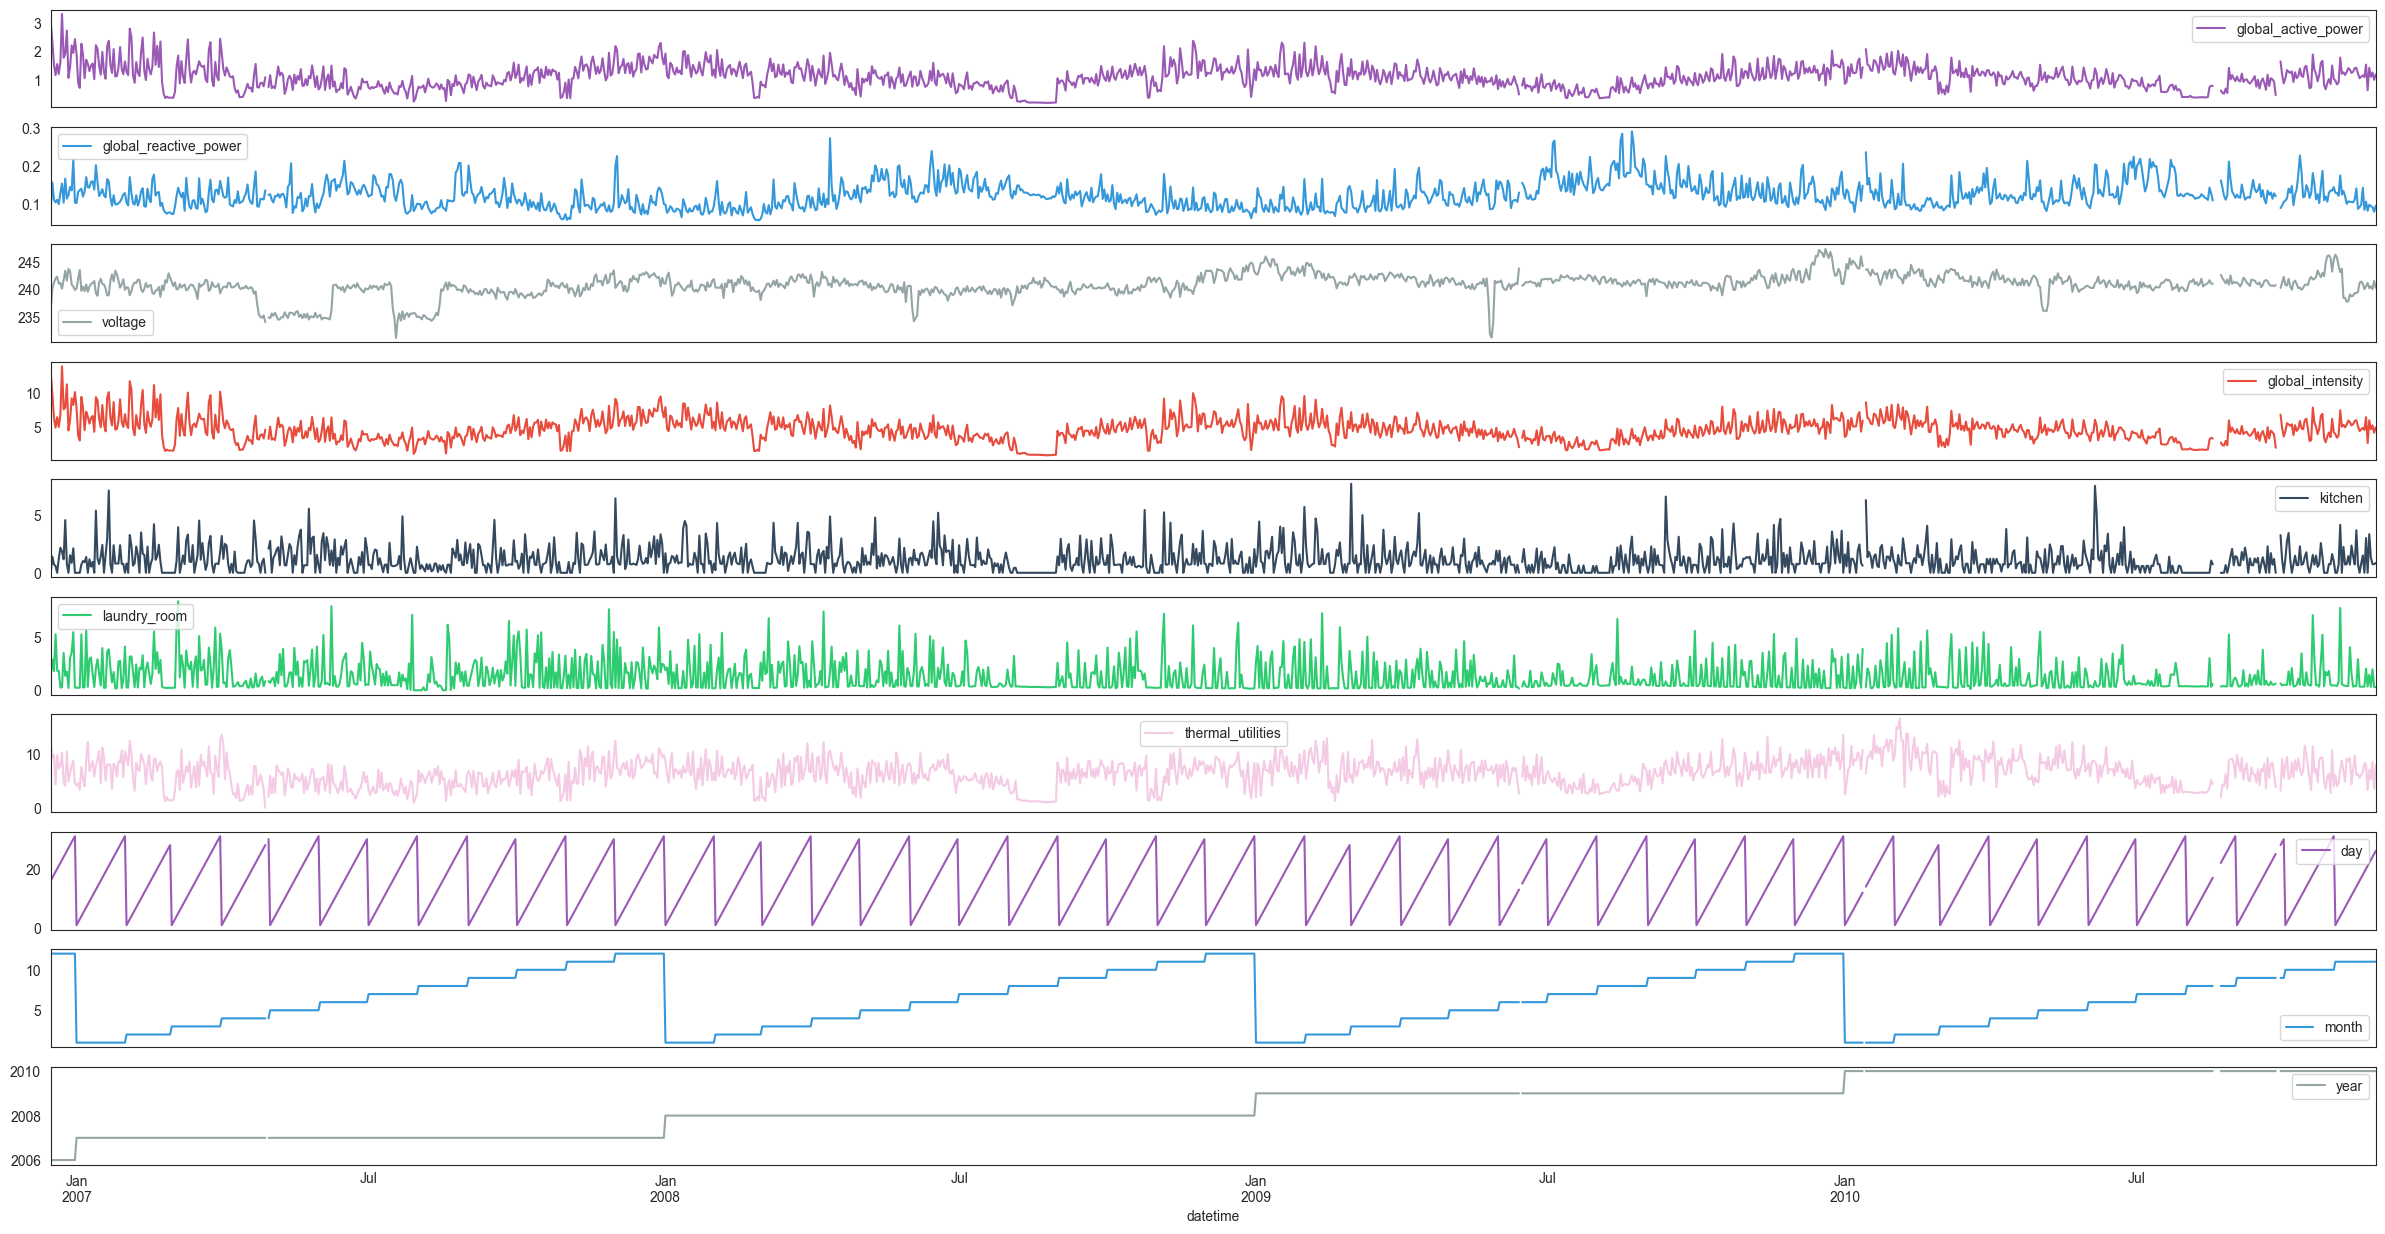

In [7]:
df.resample('D').mean().plot(subplots=True, figsize=(30,15))
plt.show()

### Preprocessing

In [9]:
df.iloc[0:2]

,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day,month,year
datetime,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006


In [10]:
split_time = 500000
x_train = df.iloc[:split_time]
x_valid = df.iloc[split_time:round(split_time*1.5)]

In [11]:
x_valid

,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day,month,year
datetime,,,,,,,,,,
2007-12-01 16:18:00,1.438,0.092,243.37,5.8,0.0,0.0,18.0,1,12,2007
2007-12-01 16:19:00,1.434,0.092,243.23,5.8,0.0,0.0,18.0,1,12,2007
2007-12-01 16:20:00,1.438,0.094,243.74,5.8,0.0,0.0,18.0,1,12,2007
2007-12-01 16:21:00,1.446,0.092,243.33,5.8,0.0,0.0,18.0,1,12,2007
2007-12-01 16:22:00,1.434,0.092,243.62,5.8,0.0,0.0,19.0,1,12,2007
...,...,...,...,...,...,...,...,...,...,...
2008-05-23 07:01:00,2.072,0.190,239.42,8.6,0.0,0.0,19.0,23,5,2008
2008-05-23 07:02:00,2.066,0.186,239.01,8.6,0.0,0.0,18.0,23,5,2008
2008-05-23 07:03:00,2.060,0.186,238.80,8.6,0.0,0.0,18.0,23,5,2008


In [12]:
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

### Training

In [14]:
dataset = windowed_dataset(x_train['global_active_power'], window_size, batch_size, shuffle_buffer_size)

In [100]:
for data in dataset:
    print(data)
    break

(<tf.Tensor: shape=(32, 20), dtype=float64, numpy=
array([[2.296, 2.278, 2.296, 2.26 , 2.94 , 2.792, 1.158, 0.932, 2.514,
        2.984, 2.996, 2.94 , 3.278, 5.908, 7.064, 6.926, 6.58 , 6.05 ,
        6.104, 4.762],
       [2.438, 2.432, 1.64 , 0.424, 1.41 , 2.722, 2.712, 2.706, 2.488,
        2.424, 1.258, 0.37 , 0.786, 2.474, 2.474, 2.488, 2.486, 2.444,
        2.272, 0.338],
       [2.294, 3.4  , 3.402, 3.418, 2.994, 1.326, 2.02 , 3.378, 3.372,
        3.374, 3.426, 1.462, 1.834, 3.462, 3.486, 2.91 , 0.936, 0.338,
        1.926, 2.42 ],
       [3.418, 3.396, 3.406, 3.406, 3.392, 3.378, 3.368, 3.35 , 3.352,
        3.364, 3.38 , 3.404, 3.378, 3.388, 3.376, 3.254, 3.214, 3.202,
        3.202, 3.212],
       [3.202, 3.202, 3.212, 3.206, 3.214, 3.206, 3.222, 3.216, 3.216,
        3.194, 3.278, 3.282, 3.292, 3.316, 3.37 , 3.42 , 3.41 , 3.4  ,
        3.4  , 3.388],
       [0.78 , 2.426, 2.412, 2.428, 1.53 , 1.388, 2.424, 2.428, 2.388,
        0.376, 2.202, 2.43 , 2.346, 1.916, 0.384, 2.3

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train['global_active_power'], window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),

    ### START CODE HERE  
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1),
    ### END CODE HERE
    
    tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])


### with custom steps ahead

In [101]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer, steps_ahead=60):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + steps_ahead, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + steps_ahead))
    
    # Split the data into features and labels
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-steps_ahead], window[-steps_ahead:]))
    
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [102]:
dataset = windowed_dataset(x_train['global_active_power'], window_size, batch_size, shuffle_buffer_size)

In [103]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train['global_active_power'], window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),

    ### START CODE HERE  
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(60),
    ### END CODE HERE
    
    tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=["mae"])
history = model.fit(dataset, epochs=3, callbacks=[lr_schedule])


Epoch 1/3
15623/15623 [==============================] - 133s 8ms/step - loss: 2.9843 - mae: 3.3987 - lr: 1.0000e-08
Epoch 2/3
15623/15623 [==============================] - 127s 8ms/step - loss: 2.3284 - mae: 2.7267 - lr: 1.1220e-08
Epoch 3/3
15623/15623 [==============================] - 124s 8ms/step - loss: 1.9897 - mae: 2.3919 - lr: 1.2589e-08


In [18]:
# temp = df['global_active_power'].values
df_drop = df.drop(columns=['global_active_power'])
df_drop
df_drop['global_active_power'] = df['global_active_power']
df_drop.head(5)

,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day,month,year,global_active_power
datetime,,,,,,,,,,
2006-12-16 17:24:00,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006,4.216
2006-12-16 17:25:00,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006,5.360
2006-12-16 17:26:00,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006,5.374
2006-12-16 17:27:00,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006,5.388
2006-12-16 17:28:00,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006,3.666


In [19]:
n = 1000000
train_df = df_drop[:int(n*0.7)]
val_df = df_drop[int(n*0.7):int(n*0.9)]
test_df = df_drop[int(n*0.9):]

__Normalization__: It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages

In [43]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
train_mean

global_reactive_power       0.113121
voltage                   239.794124
global_intensity            5.015965
kitchen                     1.240570
laundry_room                1.638319
thermal_utilities           6.044724
day                        15.667400
month                       5.772780
year                     2007.191924
global_active_power         1.179945
dtype: float64

### CNN

#### split dataset v1 (fail)

In [172]:
df_drop.shape[1]

10

In [174]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer, steps_ahead=60):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + steps_ahead, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + steps_ahead))
    
    # Split the data into features and labels
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-steps_ahead], window[-steps_ahead:]))
    
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset


In [202]:
import tensorflow as tf

def windowed_dataset(series, input_window_size, output_window_size, batch_size, shuffle_buffer):
    """
    Generates a windowed dataset for training time series models.

    :param series: Multivariate time series data.
    :param input_window_size: Number of time steps in each input window.
    :param output_window_size: Number of time steps to predict.
    :param batch_size: Batch size for the dataset.
    :param shuffle_buffer: Buffer size for shuffling the data.
    :return: A TensorFlow dataset of windowed input-output pairs.
    """
    # Create a dataset of windows
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(input_window_size + output_window_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(input_window_size + output_window_size))
    
    # Map each window to an input-output pair
    dataset = dataset.map(lambda window: (window[:input_window_size], window[-output_window_size:]))
    
    # Shuffle, batch, and prefetch
    dataset = dataset.shuffle(shuffle_buffer).batch(batch_size).prefetch(1)
    return dataset


In [175]:
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

train_dataset = windowed_dataset(train_df, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(val_df, window_size, batch_size, shuffle_buffer_size)
test_dataset = windowed_dataset(test_df, window_size, batch_size, shuffle_buffer_size)

In [203]:
input_window_size = 60  # e.g., past 60 time steps
output_window_size = 60  # e.g., next 60 time steps to predict
batch_size = 32
shuffle_buffer = 1000

# Assuming 'scaled_data' is your preprocessed multivariate time series data
train_dataset = windowed_dataset(train_df, input_window_size, output_window_size, batch_size, shuffle_buffer)
val_dataset = windowed_dataset(val_df, input_window_size, output_window_size, batch_size, shuffle_buffer)
test_dataset = windowed_dataset(test_df, input_window_size, output_window_size, batch_size, shuffle_buffer)


In [205]:
# for data in train_dataset:
#     print(data[0])
#     break

(32, 60, 10) (32, 60, 10)


In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

num_prediction_steps = 60
num_features = 9
num_epochs = 3


# Define the model
model = Sequential([
    # Convolutional layer
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_window_size, num_features)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    # Dense layers for prediction
    Dense(32, activation='relu'),
    Dense(num_prediction_steps)  # num_prediction_steps should be 60 for your case
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset)

# Evaluate the model
model.evaluate(test_dataset)

# Make predictions
# predictions = model.predict(new_data)


Epoch 1/3


ValueError: in user code:

    File "c:\Users\sclab\anaconda3\envs\xai\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\sclab\anaconda3\envs\xai\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sclab\anaconda3\envs\xai\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\sclab\anaconda3\envs\xai\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\sclab\anaconda3\envs\xai\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\sclab\anaconda3\envs\xai\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_11" is incompatible with the layer: expected shape=(None, 60, 9), found shape=(None, None, 10)


In [193]:

for data in train_dataset:
    print(data)
    break

(<tf.Tensor: shape=(32, 60, 10), dtype=float64, numpy=
array([[[ 0.24945661, -0.67616946,  2.88357712, ...,  1.69745005,
         -2.55326673,  2.92451306],
        [ 0.36082405, -0.73195617,  2.88357712, ...,  1.69745005,
         -2.55326673,  2.92282066],
        [ 0.26801785, -0.52275599,  2.88357712, ...,  1.69745005,
         -2.55326673,  2.93805226],
        ...,
        [-0.04752325,  2.29168385, -0.72489503, ...,  1.69745005,
         -2.55326673, -0.73784003],
        [-0.10320697,  2.34468123, -0.76498916, ...,  1.69745005,
         -2.55326673, -0.75307163],
        [-0.38162558,  1.62224325,  0.99915277, ...,  1.69745005,
         -2.55326673,  1.06795052]],

       [[ 0.36082405, -2.29398423,  1.88122374, ...,  1.69745005,
         -2.55326673,  1.83630001],
        [ 0.36082405, -2.26888021,  1.88122374, ...,  1.69745005,
         -2.55326673,  1.83799241],
        [ 0.37938529, -2.1126774 ,  1.88122374, ...,  1.69745005,
         -2.55326673,  1.84814681],
        ...,

#### v2

In [44]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                train_df=train_df, val_df=val_df, test_df=test_df,
                label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                            enumerate(label_columns)}
            self.column_indices = {name: i for i, name in
                                enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    

In [45]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=1,
                     label_columns=['global_active_power'])
w1

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['global_active_power']

In [46]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [47]:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 25, 10)
Inputs shape: (3, 24, 10)
Labels shape: (3, 1, 1)


In [48]:
w1.example = example_inputs, example_labels

In [49]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time (m)')

WindowGenerator.plot = plot

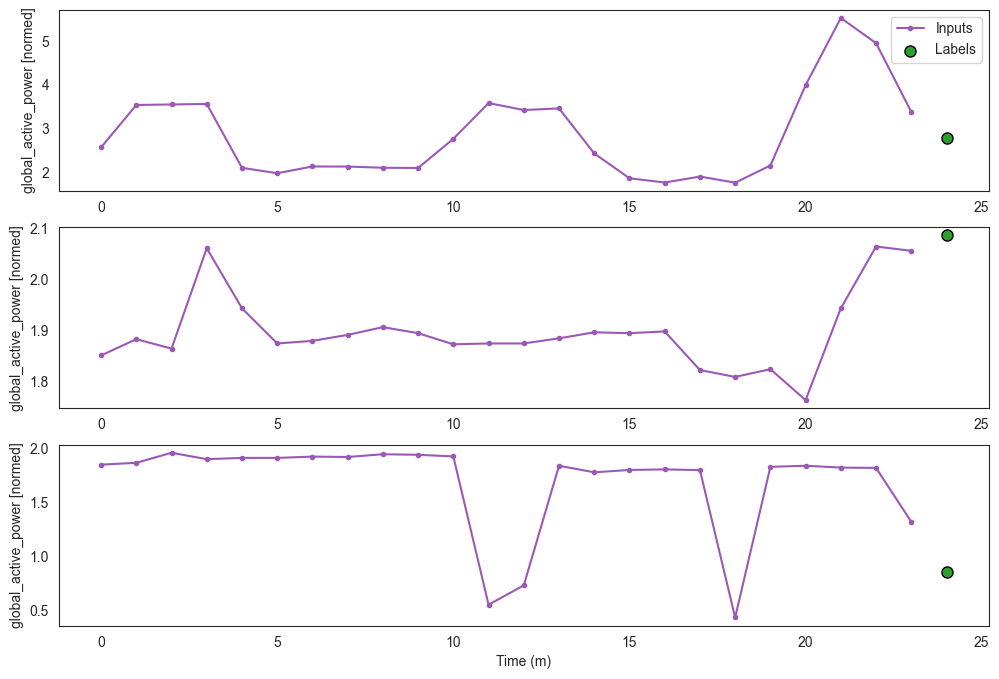

In [50]:
w1.plot(plot_col='global_active_power')

In [51]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [52]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [53]:
# Each element is an (inputs, label) pair.
w1.train.element_spec

(TensorSpec(shape=(None, 24, 10), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [54]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['global_active_power'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['global_active_power']

In [55]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 10)
Labels shape (batch, time, features): (32, 1, 1)


Linear model

In [56]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=patience,
                                                        mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

Input shape: (32, 1, 10)
Output shape: (32, 1, 1)


In [57]:
history = compile_and_fit(linear, single_step_window)
val_performance = {}
performance = {}

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
21875/21875 [==============================] - 70s 3ms/step - loss: 0.1003 - mean_absolute_error: 0.1225 - val_loss: 0.0457 - val_mean_absolute_error: 0.0826
Epoch 2/20
21875/21875 [==============================] - 68s 3ms/step - loss: 0.0637 - mean_absolute_error: 0.0944 - val_loss: 0.0456 - val_mean_absolute_error: 0.0818
Epoch 3/20
21875/21875 [==============================] - 69s 3ms/step - loss: 0.0637 - mean_absolute_error: 0.0944 - val_loss: 0.0458 - val_mean_absolute_error: 0.0822
Epoch 4/20
6250/6250 [==============================] - 13s 2ms/step - loss: 0.0456 - mean_absolute_error: 0.0830


In [58]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['global_active_power'])

wide_window

print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


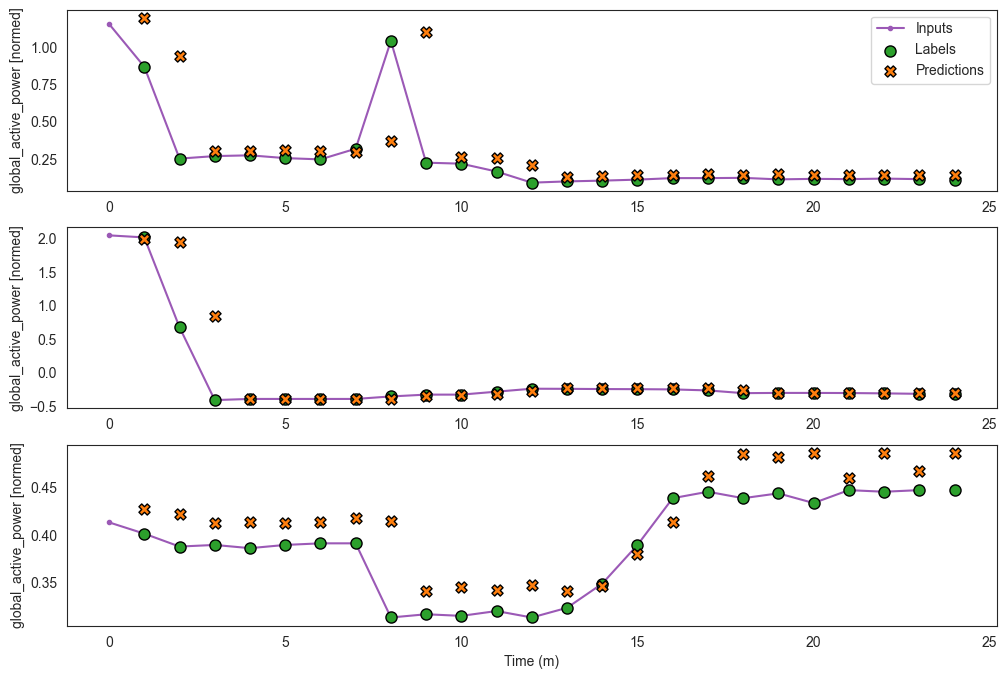

In [59]:
wide_window.plot(linear, plot_col='global_active_power')

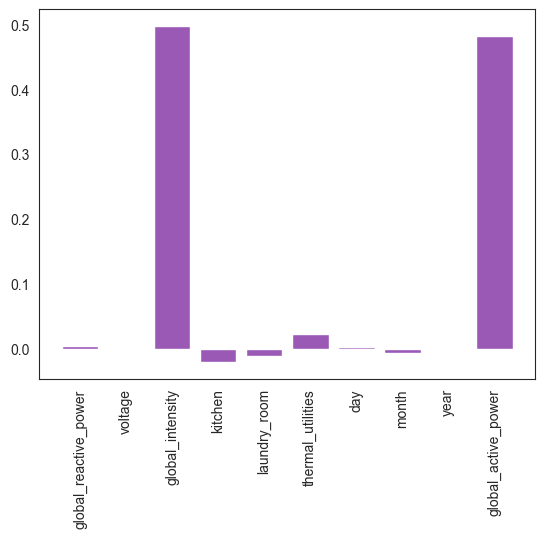

In [60]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

Dense


In [63]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
21875/21875 [==============================] - 111s 5ms/step - loss: 0.0639 - mean_absolute_error: 0.1024 - val_loss: 0.0431 - val_mean_absolute_error: 0.0816
Epoch 2/20
21875/21875 [==============================] - 110s 5ms/step - loss: 0.0606 - mean_absolute_error: 0.0969 - val_loss: 0.0416 - val_mean_absolute_error: 0.0797
Epoch 3/20
21875/21875 [==============================] - 111s 5ms/step - loss: 0.0595 - mean_absolute_error: 0.0955 - val_loss: 0.0417 - val_mean_absolute_error: 0.0819
Epoch 4/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.0418 - mean_absolute_error: 0.0814


Multisteps

In [64]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['global_active_power'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['global_active_power']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

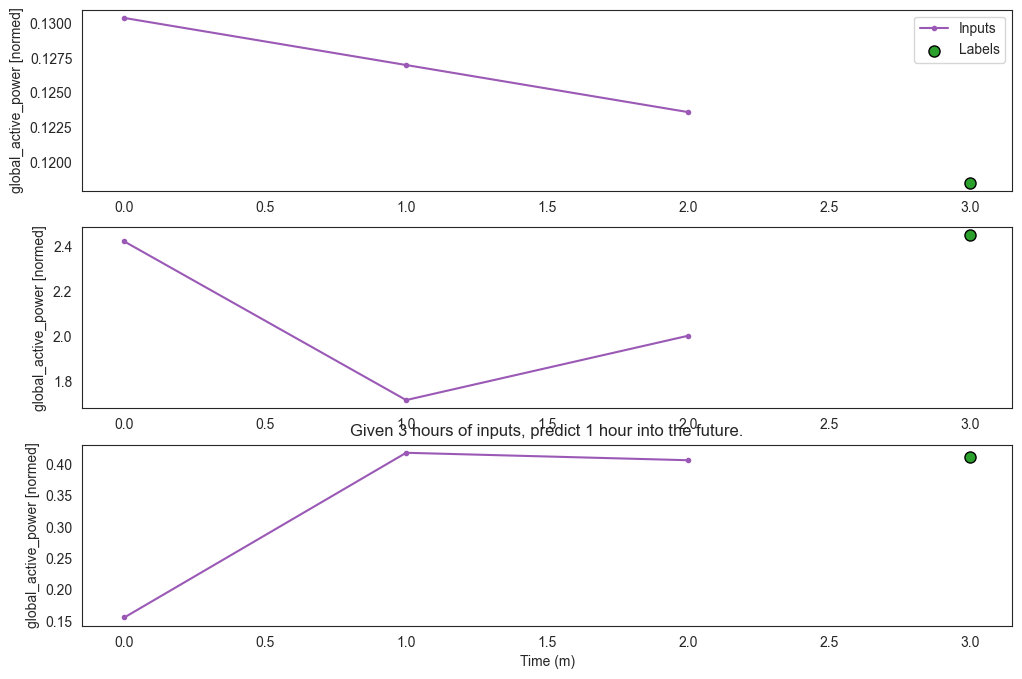

In [65]:
conv_window.plot(plot_col='global_active_power')
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [66]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [67]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 10)
Output shape: (32, 1, 1)


In [68]:
history = compile_and_fit(multi_step_dense, conv_window)

# IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/20
21875/21875 [==============================] - 77s 3ms/step - loss: 0.0598 - mean_absolute_error: 0.1032 - val_loss: 0.0398 - val_mean_absolute_error: 0.0809
Epoch 2/20
21875/21875 [==============================] - 77s 3ms/step - loss: 0.0543 - mean_absolute_error: 0.0934 - val_loss: 0.0381 - val_mean_absolute_error: 0.0772
Epoch 3/20
21875/21875 [==============================] - 76s 3ms/step - loss: 0.0528 - mean_absolute_error: 0.0908 - val_loss: 0.0399 - val_mean_absolute_error: 0.0916
Epoch 4/20
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0398 - mean_absolute_error: 0.0908


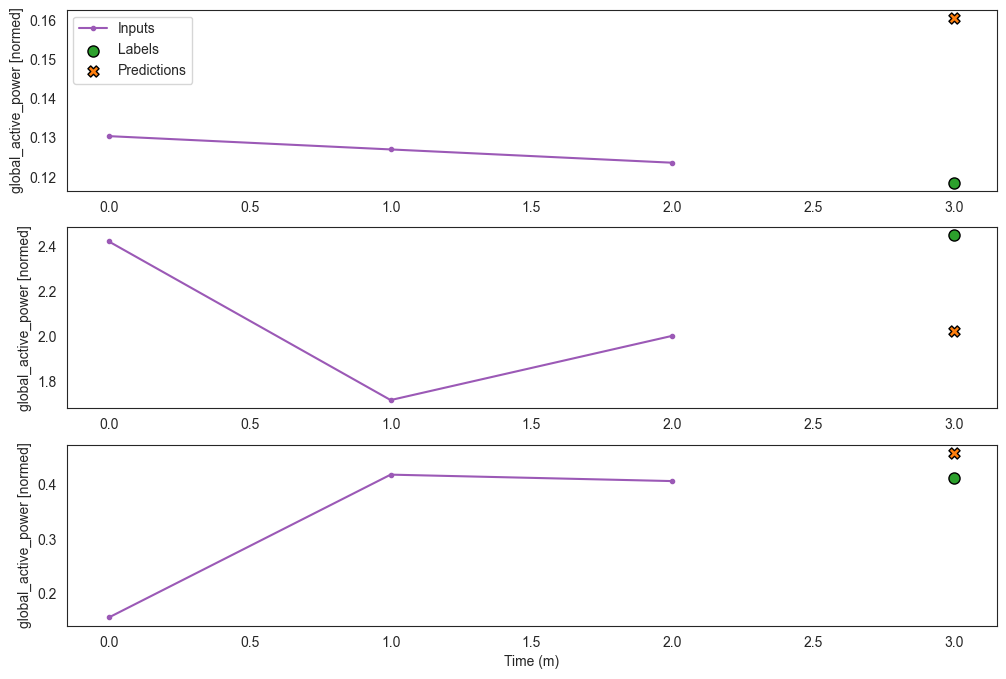

In [69]:
conv_window.plot(multi_step_dense, plot_col='global_active_power')

__CNN__

In [2]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

NameError: name 'CONV_WIDTH' is not defined

In [71]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 10)
Output shape: (32, 1, 1)


In [72]:
import IPython

In [73]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/20


: 

In [1]:
import tensorflow as tf
len(tf.config.list_physical_devices('CPU'))

1